In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!pip install pandas

In [5]:
!pip install --upgrade pandas

In [8]:
df=pd.read_csv(r"C:\Users\aadit\OneDrive\Documents\Git hub csv files\Salary_Data.csv")

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


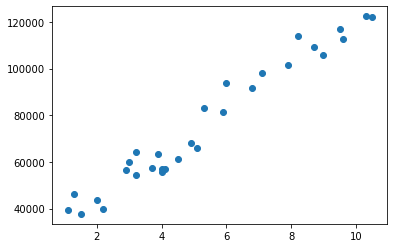

In [11]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state=101)

# linear regression

In [184]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [185]:
LR.fit(X_train,y_train)

LinearRegression()

In [186]:
y_pred_LR = LR.predict(X_test)

In [187]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [188]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [189]:
y_pred_LR

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [190]:
diff_LR = y_test - y_pred_LR

In [191]:
res_df = pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns = ['Prediction','Original Data','Diff']

In [192]:
res_df

,Prediction,Original Data,Diff
0,91477.927966,91738.0,260.072034
1,109893.228025,109431.0,-462.228025
2,56585.780487,54445.0,-2140.780487
3,82754.891096,81363.0,-1391.891096
4,40108.933066,37731.0,-2377.933066
5,118616.264895,112635.0,-5981.264895
6,117647.038576,116969.0,-678.038576
7,75001.080545,66029.0,-8972.080545
8,112800.906981,105582.0,-7218.906981
9,125400.849127,122391.0,-3009.849127


<function matplotlib.pyplot.show(close=None, block=None)>

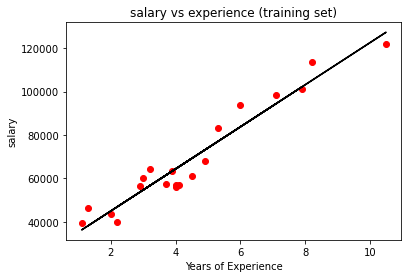

In [193]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,LR.predict(X_train),color = 'black')
plt.title('salary vs experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('salary')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

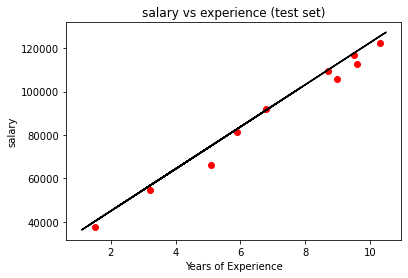

In [194]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,LR.predict(X_train),color = 'black')
plt.title('salary vs experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('salary')
plt.show

# metrics

In [195]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
R2 = metrics.r2_score(y_test,y_pred_LR)

In [196]:
rmse

4363.043260343273

In [197]:
R2

0.974811112371526

In [205]:
LR.predict([[1]])

array([170954.48611383])

# decision tree Regressor

In [208]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
DT = DecisionTreeRegressor()

In [211]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [214]:
y_pred_DT = DT.predict(X_test)

In [215]:
y_pred_DT

array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [213]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [216]:
diff_DT = y_test - y_pred_DT

In [217]:
res_DT = pd.concat([pd.Series(y_pred_DT),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_DT.columns = ['Prediction','Original Data','Diff']

In [218]:
res_DT

,Prediction,Original Data,Diff
0,98273.0,91738.0,-6535.0
1,113812.0,109431.0,-4381.0
2,64445.0,54445.0,-10000.0
3,93940.0,81363.0,-12577.0
4,46205.0,37731.0,-8474.0
5,121872.0,112635.0,-9237.0
6,121872.0,116969.0,-4903.0
7,67938.0,66029.0,-1909.0
8,113812.0,105582.0,-8230.0
9,121872.0,122391.0,519.0


# Metrics

In [219]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
R2 = metrics.r2_score(y_test,y_pred_DT)

In [220]:
rmse

7568.996703658947

In [221]:
R2

0.9241934760377903

In [222]:
from sklearn import tree

In [223]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [64445.00]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

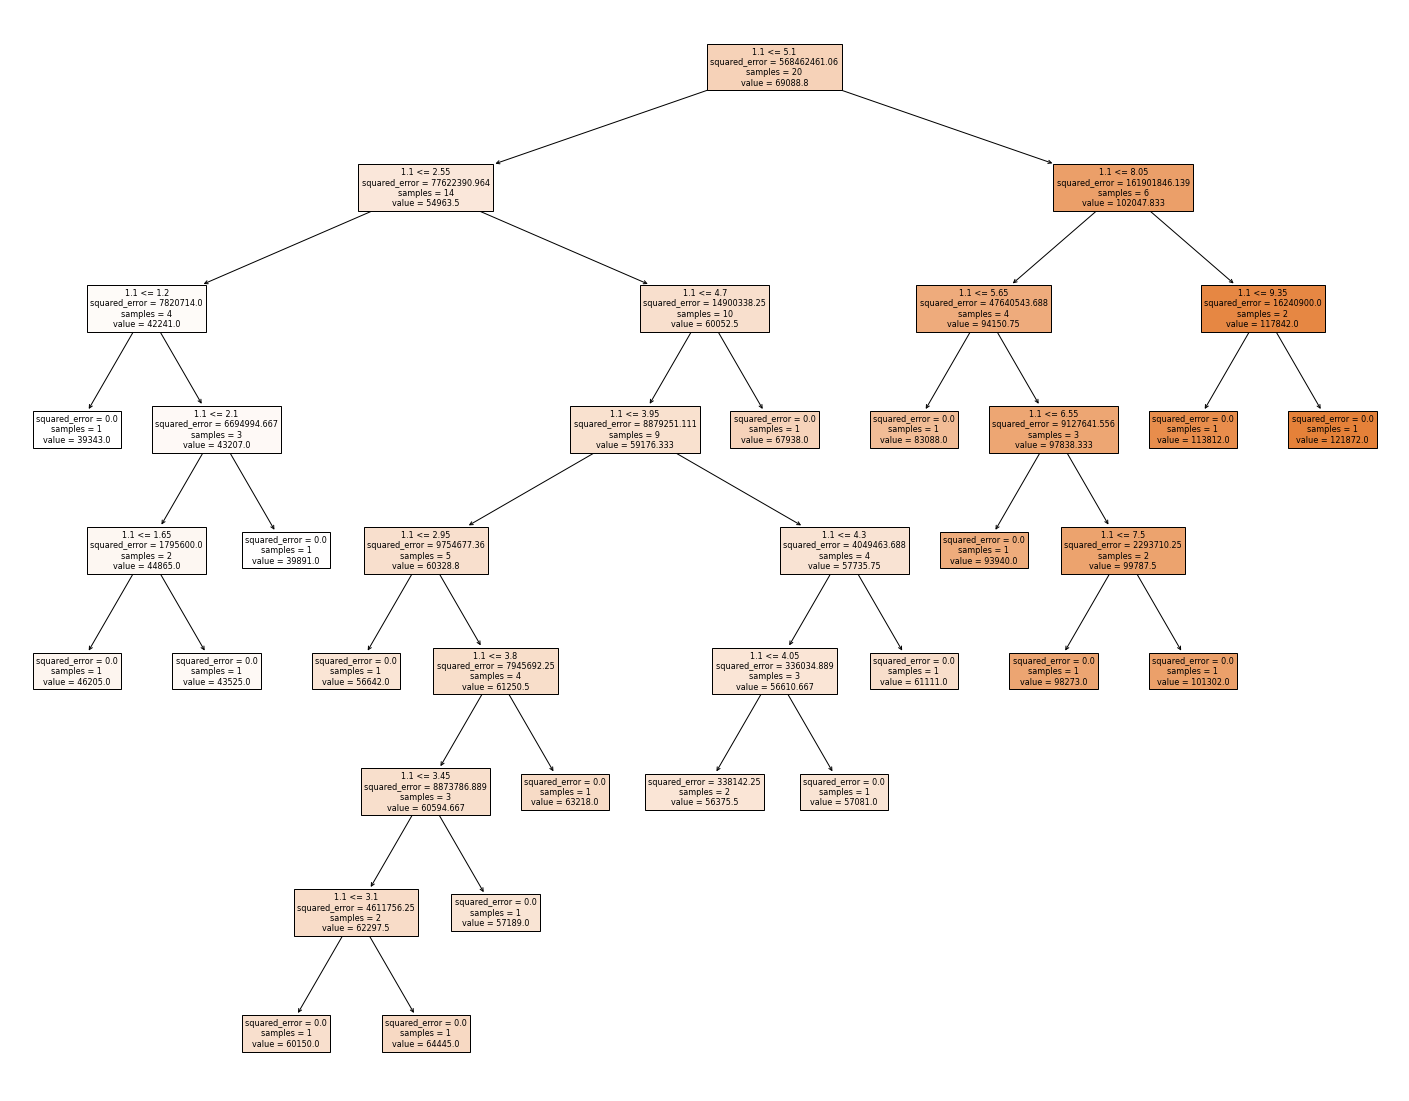

In [229]:
fig = plt.figure(figsize=(25,20))
dia = tree.plot_tree(DT,feature_names=df['YearsExperience'],filled=True)